### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
dfdata = pd.read_csv("data.csv")
dfitem = pd.read_csv("item.csv")
dfuser = pd.read_csv("user.csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
print("DATA:-----------------")
dfdata.info()
dfdata.shape
dfdata.describe()
print("Is Null?")
print(dfdata.isnull().any())
print()
print("ITEM:-----------------")
dfitem.info()
dfitem.shape
dfitem.describe()
print("Is Null?")
print(dfitem.isnull().any())
print()
print("USER:-----------------")
dfuser.info()
dfuser.shape
dfuser.describe()
print("Is Null?")
print()
print(dfuser.isnull().any())

DATA:-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
Is Null?
user id      False
movie id     False
rating       False
timestamp    False
dtype: bool

ITEM:-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null

#### 4. Find the number of movies per genre using the item data - 5 marks

In [4]:
# use sum on the default axis
dfgenre = dfitem.loc[:,'unknown':'Western']
print("Genre"," "*5,"No. of Movies")
dfgenre.sum()

Genre       No. of Movies


unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [5]:
#hint: use sum on the axis = 
print("Movies with more than 1 genre are ...")
dfitem.loc[:,'movie title'][dfgenre.sum(axis=1)>1]

Movies with more than 1 genre are ...


0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [6]:
dfitem.drop(index=dfitem[dfitem.unknown==1].index, inplace=True)

In [7]:
dfitem[dfitem.unknown==1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

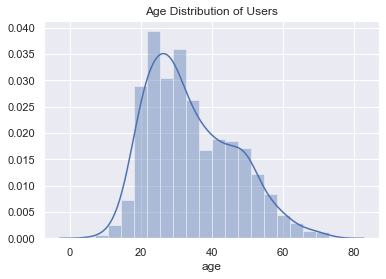

In [8]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.
sns.distplot(dfuser.age);
plt.title("Age Distribution of Users");

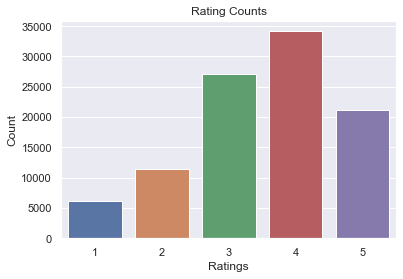

In [9]:
sns.countplot(dfdata.rating);
plt.title("Rating Counts");
plt.xlabel("Ratings");
plt.ylabel("Count");

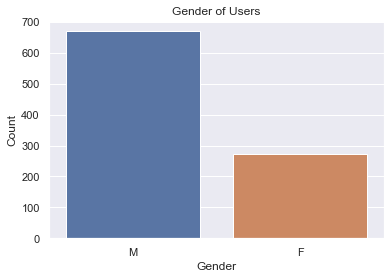

In [10]:
sns.countplot(dfuser.gender);
plt.title("Gender of Users");
plt.xlabel("Gender");
plt.ylabel("Count");

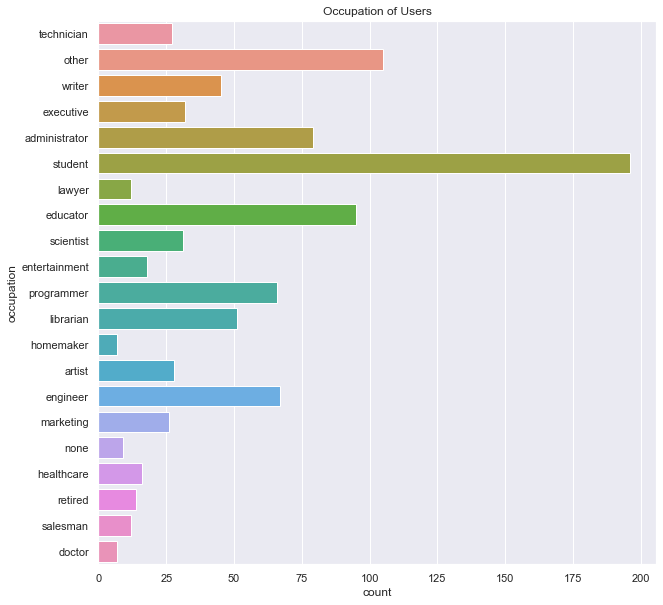

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(y=dfuser.occupation);
plt.title("Occupation of Users");

In [12]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [13]:
#your answers here
dfitem["year"] = dfitem["release date"].apply(lambda x: int(x[-4:]))

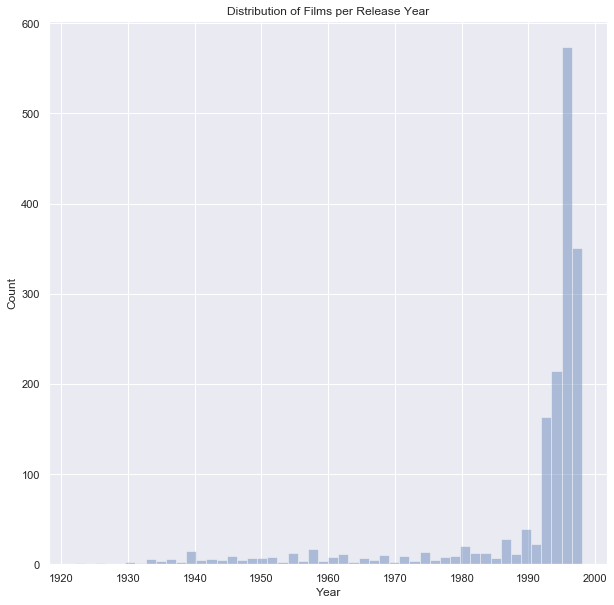

In [14]:
plt.figure(figsize=(10,10))
sns.distplot(dfitem.year, kde=False);
plt.title("Distribution of Films per Release Year");
plt.xlabel("Year");
plt.ylabel("Count");

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

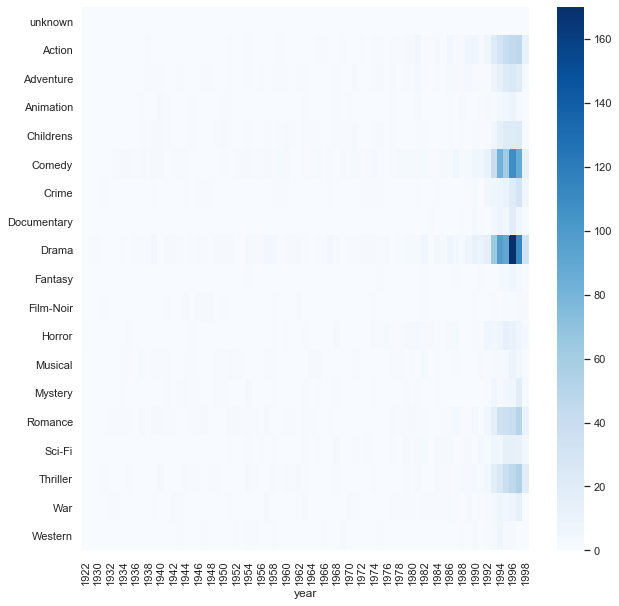

In [15]:
#Your answer here
plt.figure(figsize=(10,10))
dfitem1 = dfitem.drop(columns="movie id")
dfitemg = dfitem1.groupby(by="year")
sns.heatmap(dfitemg.sum().T,cmap="Blues");

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [17]:
#your answer here
dfmerged = pd.merge(dfdata, dfitem, on='movie id', how="inner")

gdf = dfmerged.groupby(by="movie id")

dfmovie = pd.DataFrame({"movie title":gdf["movie title"].first(),"count":gdf["rating"].count(), \
                   "rating":gdf["rating"].mean()})

dfmovie.sort_values(by="rating", ascending=False, inplace=True)
dfmovie[dfmovie["count"] > 100].head(25)


,movie title,count,rating
movie id,,,
408,"Close Shave, A",112,4.491071
318,Schindler's List,298,4.466443
169,"Wrong Trousers, The",118,4.466102
483,Casablanca,243,4.456790
64,"Shawshank Redemption, The",283,4.445230
603,Rear Window,209,4.387560
12,"Usual Suspects, The",267,4.385768
50,Star Wars,583,4.358491
178,12 Angry Men,125,4.344000


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [18]:
dfmerged2 = pd.merge(dfuser, dfmerged, on='user id', how="inner")
gdf2 = dfmerged2.groupby(by="gender")
dfgr = pd.DataFrame(gdf2['Action', 'Adventure', 'Animation', \
      'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', \
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', \
       'Thriller', 'War', 'Western'].sum())

dfgr.T.div(dfgr.T.sum())*100

C:\Users\Bikram\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


gender,F,M
Action,10.133889,12.680320
Adventure,5.849053,6.679087
Animation,1.852852,1.642708
Childrens,4.156347,3.115480
Comedy,15.023929,13.698044
Crime,3.340720,3.940611
Documentary,0.348224,0.359382
Drama,20.498687,18.181189
Fantasy,0.675965,0.622467
Film-Noir,0.716933,0.848418


#### Conclusion:



* Men watch more drama than women
 * No. Men 18.2% Women 20.5%

* Women watch more Sci-Fi than men
 * No. Men 6.35%, Women 4.89%

* Men watch more Romance than women
 * No. Men 8.56%, Women 10.9% 